In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

from sklearn.datasets import load_digits, load_iris

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


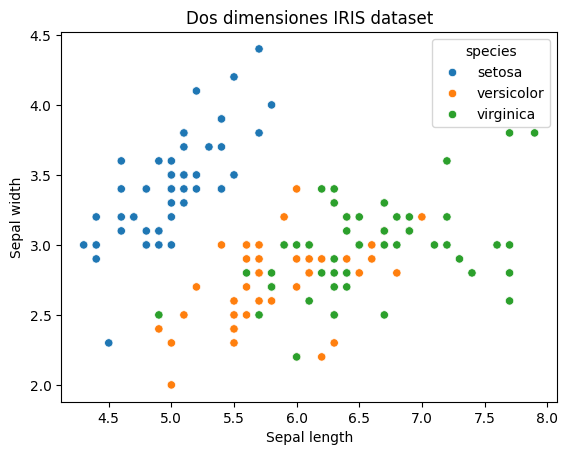

In [5]:
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species")

plt.title('Dos dimensiones IRIS dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

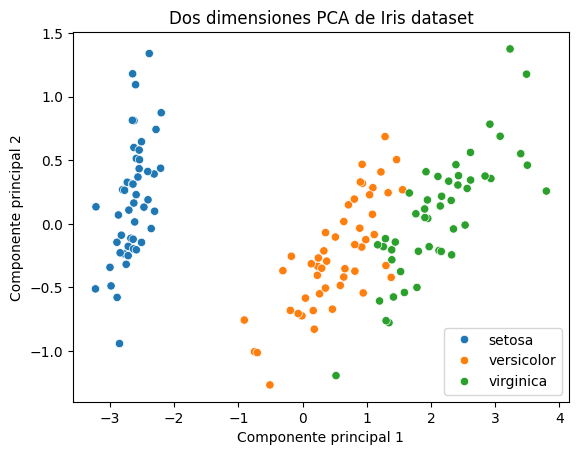

In [8]:
X = iris.to_numpy()[:, :4]

pca = PCA(n_components=2)

X_r = pca.fit(X).transform(X)
data = pd.DataFrame(X_r)
data["species"] = iris["species"]
sns.scatterplot(data, x=0, y=1, hue="species")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Dos dimensiones PCA de Iris dataset")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")

plt.show()

In [10]:
digits = load_digits()
digits.data.shape

(1797, 64)

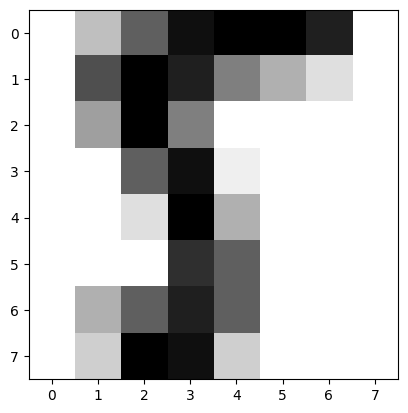

In [11]:
plt.imshow(digits.data[376].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))
plt.show()

In [13]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
projected = pd.DataFrame(projected)
projected["target"] = digits["target"]
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


Text(0, 0.5, 'Componente pricipal 2')

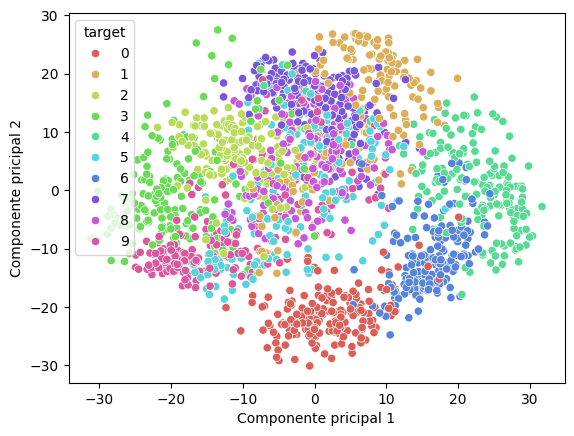

In [14]:
sns.scatterplot(projected, x=0, y=1, hue="target", palette=sns.color_palette("hls", 10))
plt.xlabel('Componente pricipal 1')
plt.ylabel('Componente pricipal 2')

In [15]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, learning_rate="auto", init="random")

X_embededd = tsne.fit_transform(digits.data)
X_embededd = pd.DataFrame(X_embededd)
X_embededd["target"] = digits["target"]
print(format((time.time()-time_start)))

c:\Users\h\Documents\geeklogbook\utilities\python\mgds\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.001s...
[t-SNE] Computed neighbors for 1797 samples in 0.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.341244
[t-SNE] KL divergence after 300 iterations: 1.333709
4.515289068222046


Text(0, 0.5, 'Dimension 2')

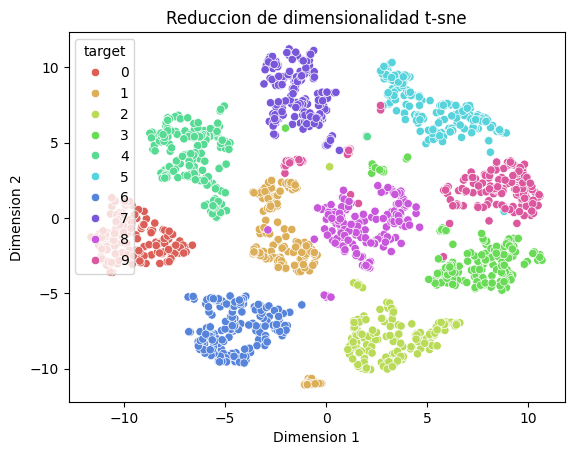

In [16]:
sns.scatterplot(X_embededd, x=0, y=1, hue="target", palette=sns.color_palette("hls",10))
plt.title("Reduccion de dimensionalidad t-sne")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [ ]:
#PCA - Lineal
#T-SNE - No lineal (estocastica)